# Multiple Models

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import lightgbm as lgbm
import catboost as cb
from sklearn.neighbors import KNeighborsRegressor
import sklearn

# Data Prep

In [2]:
# import data
train_logs = pd.read_csv("/Users/helloworld/Desktop/linking-writing-processes-to-writing-quality/train_logs.csv")
train_scores = pd.read_csv("/Users/helloworld/Desktop/linking-writing-processes-to-writing-quality/train_scores.csv")
sample_sub = pd.read_csv("/Users/helloworld/Desktop/linking-writing-processes-to-writing-quality/sample_submission.csv")
test_logs = pd.read_csv("/Users/helloworld/Desktop/linking-writing-processes-to-writing-quality/test_logs.csv")

In [3]:
train_data = train_logs.merge(train_scores, how='inner', on="id")

In [4]:
train_data

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,score
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,3.5
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1,3.5
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240,4.0
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240,4.0
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240,4.0
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240,4.0


In [5]:
len(train_data["id"].unique())

2471

In [6]:
test_logs

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0
5,4444cccc,2,184996,185052,56,Input,q,q,q,1,1


In [7]:
train_data["activity"].describe()

count     8405898
unique         50
top         Input
freq      6726796
Name: activity, dtype: object

In [8]:
train_data[train_data["id"]=="001519c8"]

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,score
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,3.5
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1,3.5
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2552,001519c8,2553,1781786,1781841,55,Remove/Cut,Backspace,Backspace,q,555,255,3.5
2553,001519c8,2554,1781917,1781991,74,Remove/Cut,Backspace,Backspace,q,554,255,3.5
2554,001519c8,2555,1782062,1782141,79,Remove/Cut,Backspace,Backspace,q,553,255,3.5
2555,001519c8,2556,1782922,1782985,63,Input,q,q,q,554,255,3.5


In [9]:
print(train_data["activity"].unique())

['Nonproduction' 'Input' 'Remove/Cut' 'Replace'
 'Move From [284, 292] To [282, 290]' 'Move From [287, 289] To [285, 287]'
 'Move From [460, 461] To [465, 466]' 'Paste'
 'Move From [905, 1314] To [907, 1316]'
 'Move From [565, 743] To [669, 847]' 'Move From [669, 847] To [565, 743]'
 'Move From [1041, 1121] To [1496, 1576]'
 'Move From [1455, 1557] To [1323, 1425]'
 'Move From [2268, 2275] To [2247, 2254]'
 'Move From [213, 302] To [902, 991]' 'Move From [0, 158] To [234, 392]'
 'Move From [460, 465] To [925, 930]' 'Move From [810, 906] To [816, 912]'
 'Move From [186, 187] To [184, 185]' 'Move From [140, 272] To [299, 431]'
 'Move From [114, 140] To [272, 298]'
 'Move From [1386, 1450] To [1445, 1509]'
 'Move From [442, 524] To [296, 378]' 'Move From [408, 414] To [390, 396]'
 'Move From [1144, 1147] To [1142, 1145]'
 'Move From [218, 220] To [206, 208]' 'Move From [164, 165] To [153, 154]'
 'Move From [623, 632] To [624, 633]'
 'Move From [747, 960] To [1041, 1254]'
 'Move From [274,

In [10]:
def feature_eng(df) :
    df_train  = df[["id","down_time",]].groupby("id").min()
    df_temp   = df[["id","up_time",]].groupby("id").max()
    df_train  = pd.merge(df_train, df_temp, on="id", how="left")
    df_temp   = df[["id","action_time",]].groupby("id").sum()
    df_train  = pd.merge(df_train, df_temp, on="id", how="left")
    df_temp   = df[["id","word_count",]].groupby("id").max()
    df_train  = pd.merge(df_train, df_temp, on="id", how="left")
        
    df["activity"] = df["activity"].str[:4]
    df["Inpu"] = df["activity"].apply(lambda x:1 if x=="Inpu" else 0)
    df["Move"] = df["activity"].apply(lambda x:1 if x=="Move" else 0)
    df["Nonp"] = df["activity"].apply(lambda x:1 if x=="Nonp" else 0)
    df["Past"] = df["activity"].apply(lambda x:1 if x=="Past" else 0)
    df["Remo"] = df["activity"].apply(lambda x:1 if x=="Remo" else 0)
    df["Repl"] = df["activity"].apply(lambda x:1 if x=="Repl" else 0)
    
    df_temp = df[["id","Inpu","Move","Nonp","Past","Remo","Repl"]].groupby("id").sum()
    df_train  = pd.merge(df_train, df_temp, on="id", how="left")
    
    df["Space"]     = df["up_event"].apply(lambda x:1 if x=="Space" else 0)
    df["Backspace"] = df["up_event"].apply(lambda x:1 if x=="Backspace" else 0)
    df["Delete"]    = df["up_event"].apply(lambda x:1 if x=="Delete" else 0)
    df["Control"]   = df["up_event"].apply(lambda x:1 if x=="Control" else 0)
    df["Enter"]     = df["up_event"].apply(lambda x:1 if x=="Enter" else 0)
    
    df_temp   = df[["id","Space","Backspace","Delete","Control","Enter"]].groupby("id").sum()
    df_train  = pd.merge(df_train, df_temp, on="id", how="left")
    
    df_temp   = df[["id","cursor_position",]].groupby("id").max()
    df_temp   = df[["id","cursor_position",]].groupby("id").mean()
    df_temp   = df[["id","word_count",]].groupby("id").mean()
    
    df_temp   = df[["id","cursor_position",]].groupby("id").max()
    df_temp   = df[["id","cursor_position",]].groupby("id").mean()
    df_temp   = df[["id","word_count",]].groupby("id").mean()
    
    
    
    
    return df_train

In [11]:
train_df = feature_eng(train_data)

In [12]:
train_df.to_csv("train_df_added_data.csv", index = False)

In [13]:
train_df = pd.read_csv("train_df_added_data.csv")

In [14]:
train_scores.drop("id", axis = 1, inplace = True)

## Multiple Models

In [20]:
params = {'reg_alpha': 0.007678095440286993, 
               'reg_lambda': 0.34230534302168353, 
               'colsample_bytree': 0.627061253588415, 
               'subsample': 0.854942238828458, 
               'learning_rate': 0.038697981947473245, 
               'num_leaves': 22, 
               'max_depth': 37, 
               'min_child_samples': 18,
               'n_estimators': 150,
               "objective": "regression",
               "metric": "rmse",
               "verbosity": 0,
              }

In [21]:
model1 = lgbm.LGBMRegressor(**params)
    
model2 = cb.CatBoostRegressor(iterations=1000,
                                 learning_rate=0.1,
                                 depth=6,
                                 eval_metric='RMSE',
                                 bagging_temperature = 0.2,
                                 od_type='Iter',
                                 metric_period = 50,
                                 od_wait=20,
                                 verbose=False)
    
model3 = sklearn.svm.SVR(kernel='rbf', C=1.0, epsilon=0.1)
    
model4 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=25, 
                                                    weights='distance', 
                                                    algorithm='auto', 
                                                    leaf_size=20, 
                                                    p=1, 
                                                    metric='minkowski', 
                                                    metric_params=None, 
                                                    n_jobs=-1)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

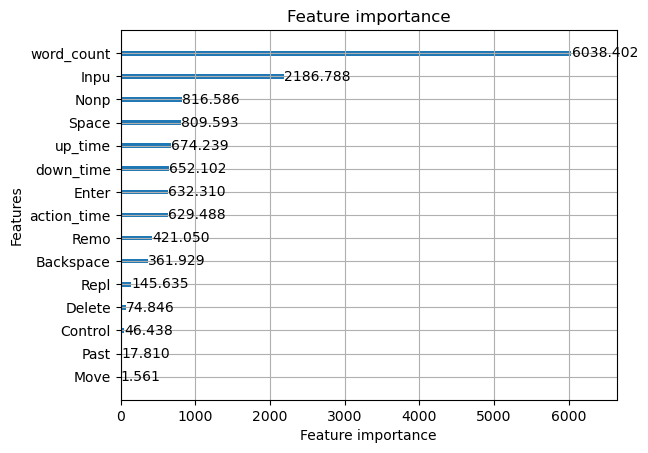

In [37]:
lgbm.plot_importance(model, importance_type="gain")

# Submission

In [38]:
df_test = feature_eng(test_logs)

In [49]:
sample_sub

,id,score
0,0000aaaa,1.0
1,2222bbbb,2.0
2,4444cccc,3.0


In [42]:
df_test

,down_time,up_time,action_time,word_count,Inpu,Move,Nonp,Past,Remo,Repl,Space,Backspace,Delete,Control,Enter
id,,,,,,,,,,,,,,,
0000aaaa,338433,760160,172,0,2,0,0,0,0,0,2,0,0,0,0
2222bbbb,290502,712023,113,1,2,0,0,0,0,0,0,0,0,0,0
4444cccc,184996,635641,150,1,2,0,0,0,0,0,1,0,0,0,0


In [43]:
predicted_scores = model.predict(df_test)

In [47]:
predicted_scores

array([0.5992953 , 0.60097535, 0.65984699])

In [45]:
df_test

,down_time,up_time,action_time,word_count,Inpu,Move,Nonp,Past,Remo,Repl,Space,Backspace,Delete,Control,Enter
id,,,,,,,,,,,,,,,
0000aaaa,338433,760160,172,0,2,0,0,0,0,0,2,0,0,0,0
2222bbbb,290502,712023,113,1,2,0,0,0,0,0,0,0,0,0,0
4444cccc,184996,635641,150,1,2,0,0,0,0,0,1,0,0,0,0


In [50]:
submissions_v2 = pd.DataFrame({'id': sample_sub['id'], 'score':predicted_scores})

In [51]:
submissions_v2.to_csv("submission.csv", index = False)

In [52]:
submissions_v2

,id,score
0,0000aaaa,0.599295
1,2222bbbb,0.600975
2,4444cccc,0.659847
